In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dphi-amsterdam-airbnb-data/airbnb_listing_validate.csv
/kaggle/input/dphi-amsterdam-airbnb-data/airbnb_listing_train.csv
/kaggle/input/dphi-amsterdam-airbnb-data/sample_submission.csv


In [2]:
# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# For Preprocessing, ML models and Evaluation
from sklearn.model_selection import train_test_split   # To split the dataset into train and test set

from sklearn.linear_model import LogisticRegression     # Logistic regression model

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder    # for converting categorical to numerical

from sklearn.metrics import f1_score    # for model evaluation


import seaborn as sns
import folium

In [3]:
data = pd.read_csv('/kaggle/input/dphi-amsterdam-airbnb-data/airbnb_listing_train.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,11602914,Luxury home 100m2+garden in center!,3123809,Marjolein,NaN,De Pijp - Rivierenbuurt,52.35368,4.90177,Entire home/apt,3,13,15-02-2020,0.27,1,0,220
1,13289321,East is where your home is!,10259430,Ana,NaN,Oud-Oost,52.35728,4.92052,Entire home/apt,4,14,19-06-2019,0.29,1,0,110
2,40779315,Amsterdam Central - LUXURY house in BUSY STREET,224969266,Mark,NaN,Centrum-West,52.37582,4.89850,Entire home/apt,2,9,16-03-2020,1.65,1,7,100
3,7820311,great appartment down town,693472,Ayden,NaN,Westerpark,52.37792,4.87300,Entire home/apt,3,42,17-02-2020,0.72,1,0,130
4,27346603,Private room with canal view in peaceful area,41888346,Alissa,NaN,Westerpark,52.38051,4.87493,Private room,2,89,26-02-2020,4.02,1,24,90


In [4]:
category_columns = ['neighbourhood_group', 'neighbourhood', 'room_type']
for cat in category_columns:
    data[cat] = data[cat].astype("category")
data.shape

(12901, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12901 entries, 0 to 12900
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              12901 non-null  int64   
 1   name                            12879 non-null  object  
 2   host_id                         12901 non-null  int64   
 3   host_name                       12893 non-null  object  
 4   neighbourhood_group             0 non-null      category
 5   neighbourhood                   12901 non-null  category
 6   latitude                        12901 non-null  float64 
 7   longitude                       12901 non-null  float64 
 8   room_type                       12901 non-null  category
 9   minimum_nights                  12901 non-null  int64   
 10  number_of_reviews               12901 non-null  int64   
 11  last_review                     11305 non-null  object  
 12  reviews_per_month 

In [6]:
data.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
count,1.290100e+04,12879,1.290100e+04,12893,0,12901,12901.000000,12901.000000,12901,12901.000000,12901.000000,11305,11305.000000,12901.000000,12901.000000,12901.000000
unique,NaN,12653,NaN,4536,0,22,NaN,NaN,4,NaN,NaN,1495,NaN,NaN,NaN,NaN
top,NaN,Amsterdam,NaN,Martijn,NaN,De Baarsjes - Oud-West,NaN,NaN,Entire home/apt,NaN,NaN,08-03-2020,NaN,NaN,NaN,NaN
freq,NaN,28,NaN,76,NaN,2209,NaN,NaN,10064,NaN,NaN,269,NaN,NaN,NaN,NaN
mean,1.984923e+07,NaN,6.321700e+07,NaN,NaN,NaN,52.365313,4.889744,NaN,3.542516,24.803194,NaN,0.748501,2.136501,61.392295,166.959538
std,1.216241e+07,NaN,8.010814e+07,NaN,NaN,NaN,0.016418,0.036016,NaN,15.154077,53.406134,NaN,1.260791,6.001838,107.988329,234.794630
min,2.016800e+04,NaN,3.592000e+03,NaN,NaN,NaN,52.289270,4.755720,NaN,1.000000,0.000000,NaN,0.010000,1.000000,0.000000,6.000000
25%,9.869642e+06,NaN,8.948269e+06,NaN,NaN,NaN,52.355190,4.863950,NaN,2.000000,2.000000,NaN,0.180000,1.000000,0.000000,99.000000
50%,1.874939e+07,NaN,2.711601e+07,NaN,NaN,NaN,52.364570,4.887130,NaN,2.000000,9.000000,NaN,0.380000,1.000000,0.000000,135.000000
75%,2.914232e+07,NaN,8.337686e+07,NaN,NaN,NaN,52.375110,4.909310,NaN,3.000000,24.000000,NaN,0.770000,1.000000,87.000000,190.000000


In [7]:
data["price_norm"] = (data.price-data.price.min())/(data.price.max()-data.price.min())

In [8]:
data_lat = data.latitude.mean()
data_long = data.longitude.mean()
colors = ["#3333DD", "#B00000"]

Text(0.5, 1.0, 'Amsterdam AirBnB Price distribution')

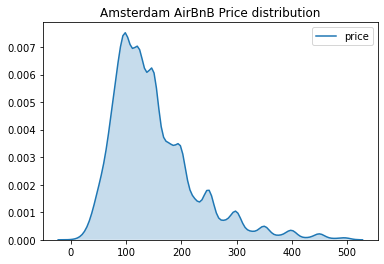

In [9]:
sns.kdeplot(data.price, shade=True, clip=(0, 500))
plt.title("Amsterdam AirBnB Price distribution")

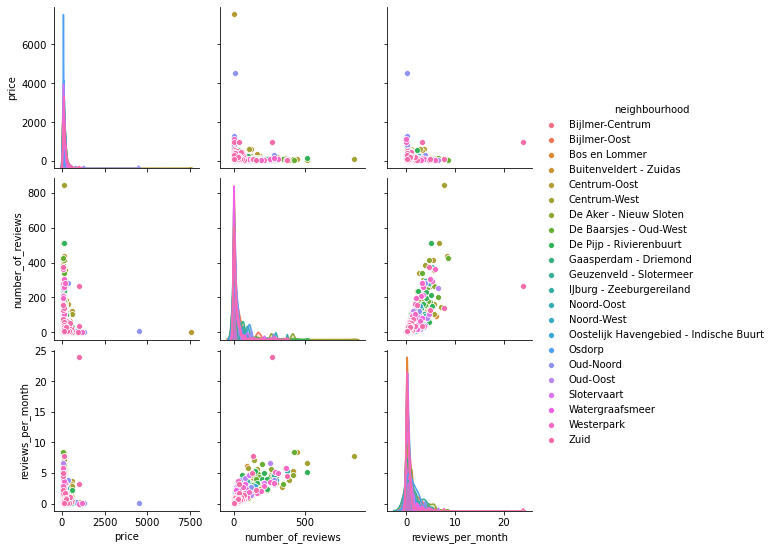

In [10]:
features = ["neighbourhood", "room_type", "price", "number_of_reviews", "reviews_per_month"]
sns.pairplot(data[features].sample(2000), hue="neighbourhood")

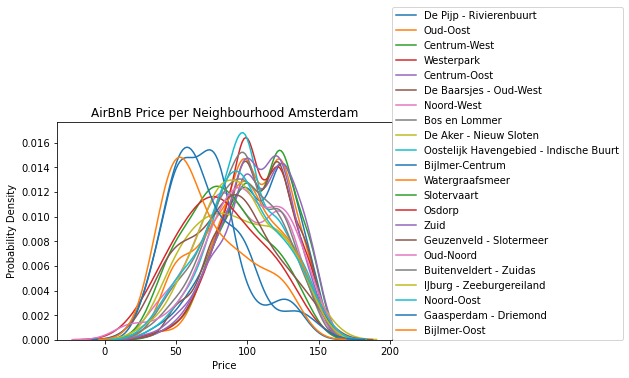

In [11]:
for n in data.neighbourhood.unique():
    sns.kdeplot(data[data.neighbourhood==n].price, shade=False, clip=(0, 150), Label=n)

  
plt.xlabel('Price') 
plt.ylabel('Probability Density') 
plt.title('AirBnB Price per Neighbourhood Amsterdam')
plt.legend(loc=(1,0))

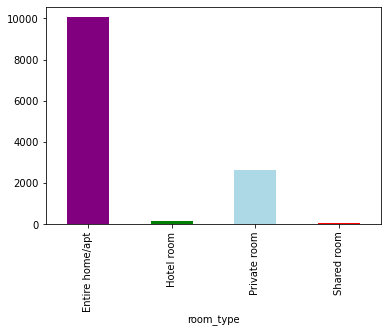

In [12]:
colors = ["purple", "green", "lightblue","red"]
data.groupby(by="room_type").count().id.plot(kind="bar", color=colors)

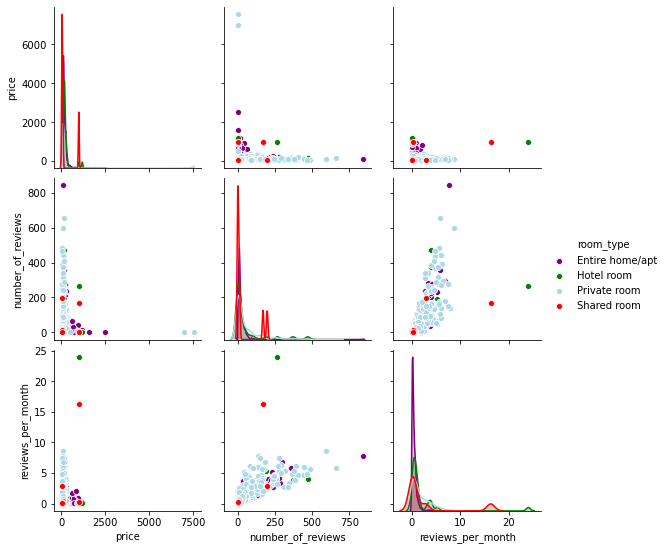

In [13]:
sns.pairplot(data[features].sample(2000), hue="room_type", palette=colors)

Text(0.5, 1.0, 'AirBnB Price per Room Type')

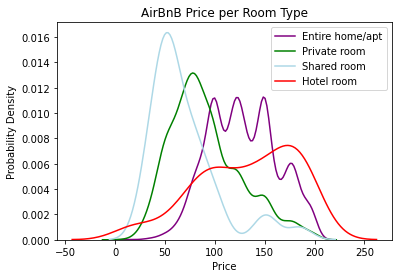

In [14]:
for i, room in enumerate(data.room_type.unique()):
    sns.kdeplot(data[data.room_type==room].price, shade=False, clip=(0, 200), Label=room, color=colors[i])
  
plt.xlabel('Price') 
plt.ylabel('Probability Density') 
plt.title('AirBnB Price per Room Type')

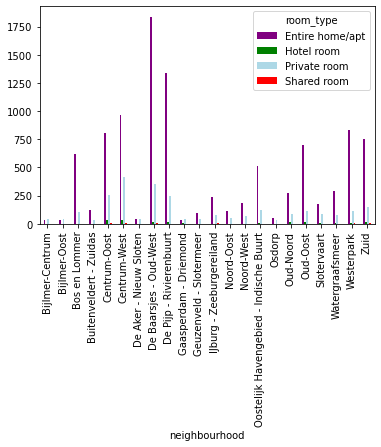

In [15]:
pd.pivot_table(data, index="neighbourhood", columns="room_type", values='id', aggfunc='count').plot(kind = 'bar', color=colors)

Text(0.5, 1.0, 'price vs longitude')

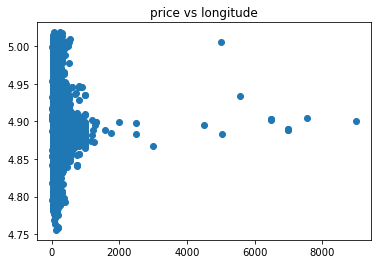

In [16]:
plt.scatter(data.price,data.longitude)
plt.title('price vs longitude')

Text(0.5, 1.0, 'price vs latitude')

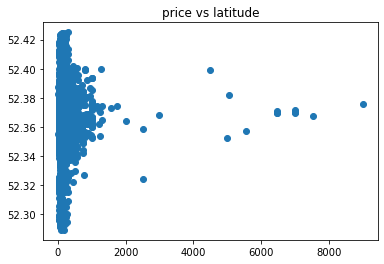

In [17]:
plt.scatter(data.price,data.latitude)
plt.title('price vs latitude')

Text(0.5, 1.0, 'Price vs number_of_reviews')

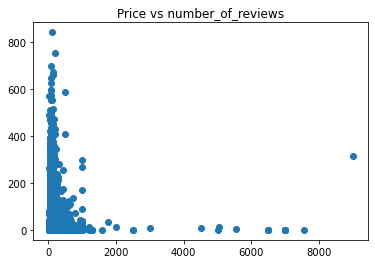

In [18]:
plt.scatter(data.price,data.number_of_reviews)
plt.title("Price vs number_of_reviews")

Text(0.5, 1.0, 'Price vs availability_365')

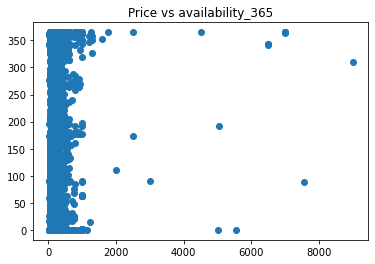

In [19]:
plt.scatter(data.price,data.availability_365)
plt.title("Price vs availability_365")

<Figure size 720x720 with 0 Axes>

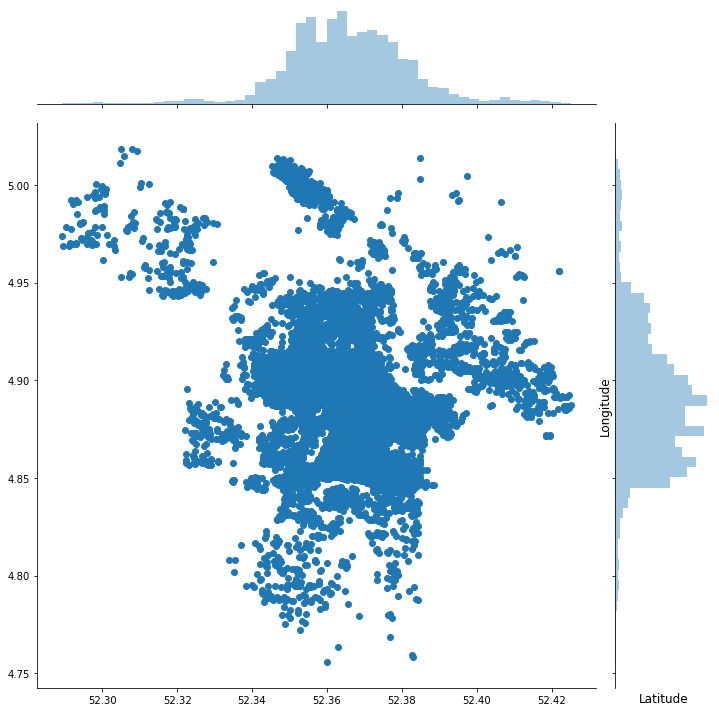

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [20]:
plt.figure(figsize=(10,10))
sns.jointplot(x=data.latitude.values, y=data.longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

In [21]:
data.isnull().sum()

id                                    0
name                                 22
host_id                               0
host_name                             8
neighbourhood_group               12901
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
minimum_nights                        0
number_of_reviews                     0
last_review                        1596
reviews_per_month                  1596
calculated_host_listings_count        0
availability_365                      0
price                                 0
price_norm                            0
dtype: int64

In [22]:
drop_columns = ['id','name','host_id','host_name','neighbourhood_group','price_norm']
data = data.drop(columns = drop_columns,axis=1)

In [23]:
data['last_review'] = pd.to_datetime(data['last_review'], infer_datetime_format=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12901 entries, 0 to 12900
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   neighbourhood                   12901 non-null  category      
 1   latitude                        12901 non-null  float64       
 2   longitude                       12901 non-null  float64       
 3   room_type                       12901 non-null  category      
 4   minimum_nights                  12901 non-null  int64         
 5   number_of_reviews               12901 non-null  int64         
 6   last_review                     11305 non-null  datetime64[ns]
 7   reviews_per_month               11305 non-null  float64       
 8   calculated_host_listings_count  12901 non-null  int64         
 9   availability_365                12901 non-null  int64         
 10  price                           12901 non-null  int64         
dtypes:

In [24]:
data['last_review'] = data['last_review'].fillna(data['last_review'].mode()[0])  # filling the missing value of 'Number_of_prev_cond'
data['reviews_per_month'] = data['reviews_per_month'].fillna(data['reviews_per_month'].mean())  # filling the missing value of 'Number_of_prev_cond'

data.isnull().sum()

neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price                             0
dtype: int64

In [25]:
def convert_to_lower_and_trim(item):
    return item.lower().strip()
data['neighbourhood'] = data['neighbourhood'].apply(convert_to_lower_and_trim)
data['room_type'] = data['room_type'].apply(convert_to_lower_and_trim)

In [26]:
data = pd.get_dummies(data,columns=['neighbourhood','room_type'])
data.shape

(12901, 35)

In [27]:
import datetime as dt
data['last_review']=data['last_review'].map(dt.datetime.toordinal)

In [28]:
data.head()

,latitude,longitude,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price,neighbourhood_bijlmer-centrum,...,neighbourhood_oud-noord,neighbourhood_oud-oost,neighbourhood_slotervaart,neighbourhood_watergraafsmeer,neighbourhood_westerpark,neighbourhood_zuid,room_type_entire home/apt,room_type_hotel room,room_type_private room,room_type_shared room
0,52.35368,4.90177,3,13,737470,0.27,1,0,220,0,...,0,0,0,0,0,0,1,0,0,0
1,52.35728,4.92052,4,14,737229,0.29,1,0,110,0,...,0,1,0,0,0,0,1,0,0,0
2,52.37582,4.89850,2,9,737500,1.65,1,7,100,0,...,0,0,0,0,0,0,1,0,0,0
3,52.37792,4.87300,3,42,737472,0.72,1,0,130,0,...,0,0,0,0,1,0,1,0,0,0
4,52.38051,4.87493,2,89,737481,4.02,1,24,90,0,...,0,0,0,0,1,0,0,0,1,0


In [29]:
test_data = pd.read_csv('/kaggle/input/dphi-amsterdam-airbnb-data/airbnb_listing_validate.csv')
test_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,12297872,"Great apartment, super location",44144487,Azarakhsh,NaN,De Baarsjes - Oud-West,52.37326,4.86213,Entire home/apt,2,49,15-09-2019,0.99,1,267
1,3920205,Lovely apartment in Center south!,7594884,"Ruben, Sarah & Lindy",NaN,De Pijp - Rivierenbuurt,52.35076,4.88866,Entire home/apt,3,34,19-09-2019,0.49,38,0
2,26614345,"Sunny family friendly house, centrally located",3903937,Maaike,NaN,Oud-Noord,52.38980,4.90881,Entire home/apt,4,3,21-04-2019,0.13,1,0
3,7433172,1 Br Apartment in Old South A'dam,24969223,Quirien,NaN,Zuid,52.34292,4.85962,Entire home/apt,4,0,NaN,NaN,1,0
4,17019744,Luxurious house with garden - central location,114138837,Sietse,NaN,Westerpark,52.37321,4.87238,Entire home/apt,2,9,24-09-2017,0.23,1,0


In [30]:
drop_columns = ['id','name','host_id','host_name','neighbourhood_group']
test_data = test_data.drop(columns = drop_columns,axis=1)

In [31]:
test_data['last_review'] = pd.to_datetime(test_data['last_review'], infer_datetime_format=True)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6451 entries, 0 to 6450
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   neighbourhood                   6451 non-null   object        
 1   latitude                        6451 non-null   float64       
 2   longitude                       6451 non-null   float64       
 3   room_type                       6451 non-null   object        
 4   minimum_nights                  6451 non-null   int64         
 5   number_of_reviews               6451 non-null   int64         
 6   last_review                     5655 non-null   datetime64[ns]
 7   reviews_per_month               5655 non-null   float64       
 8   calculated_host_listings_count  6451 non-null   int64         
 9   availability_365                6451 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(2)
memory usage: 504.

In [32]:
test_data['neighbourhood'] = test_data['neighbourhood'].apply(convert_to_lower_and_trim)
test_data['room_type'] = test_data['room_type'].apply(convert_to_lower_and_trim)

In [33]:
test_data = pd.get_dummies(test_data,columns=['neighbourhood','room_type'])
test_data.shape

(6451, 34)

In [34]:
test_data['last_review']=test_data['last_review'].map(dt.datetime.toordinal)

In [35]:
test_data['reviews_per_month'] = test_data['reviews_per_month'].fillna(test_data['reviews_per_month'].mean())  # filling the missing value of 'Number_of_prev_cond'
test_data.isnull().sum()

latitude                                                0
longitude                                               0
minimum_nights                                          0
number_of_reviews                                       0
last_review                                             0
reviews_per_month                                       0
calculated_host_listings_count                          0
availability_365                                        0
neighbourhood_bijlmer-centrum                           0
neighbourhood_bijlmer-oost                              0
neighbourhood_bos en lommer                             0
neighbourhood_buitenveldert - zuidas                    0
neighbourhood_centrum-oost                              0
neighbourhood_centrum-west                              0
neighbourhood_de aker - nieuw sloten                    0
neighbourhood_de baarsjes - oud-west                    0
neighbourhood_de pijp - rivierenbuurt                   0
neighbourhood_

In [36]:
#X = data.drop(['price'],axis=1)
X = data.drop(['price','latitude','longitude'],axis=1)
Y = data['price']
X_test = test_data.drop(['latitude','longitude'],axis=1)
#y_test = pd.DataFrame(0, index=np.arange(len(X_test)),columns=[])

#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train_sc = sc.fit_transform(X)
#X_test_sc = sc.transform(X_test)

In [37]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.20,random_state =2)


In [38]:
#from sklearn.decomposition import PCA
#max_components = 32 # as many components as input dimensions
#pca = PCA(n_components=max_components, random_state=5)
#pca.fit(x_train)
#X_train_pca = pca.transform(x_train)
#x_test_pca = pca.transform(x_test)
#X_test_pca = pca.transform(X_test_sc)

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
reg.fit(x_train,y_train)
predict = reg.predict(x_test)
print("Test RMSE Score :",mean_squared_error(y_test,predict,squared=False))

Test RMSE Score : 265.9792820107456


In [40]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(random_state = 42, n_estimators = 10 )
reg.fit(x_train,y_train)
predict = reg.predict(x_test)
print("Test RMSE Score :",mean_squared_error(y_test,predict,squared=False))

Test RMSE Score : 266.5727628283641


In [41]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 500, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')
clf.fit(x_train, y_train)
predict = clf.predict(x_test)
print("Test RMSE Score :",mean_squared_error(y_test,predict,squared=False))

Test RMSE Score : 236.46703373615094


In [42]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 1000, max_depth = 6, min_samples_split = 2,
          learning_rate = 0.01, loss = 'ls')
clf.fit(x_train, y_train)
predict = clf.predict(x_test)
print("Test RMSE Score :",mean_squared_error(y_test,predict,squared=False)) #best result=213.25

Test RMSE Score : 232.26756497335722


In [43]:
import xgboost
from xgboost import plot_importance

model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.01,
                 max_depth=6,
                 min_child_weight=2,
                 n_estimators=2000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

model.fit(x_train, y_train)
predict = model.predict(x_test)
print("Test RMSE Score :",mean_squared_error(y_test,predict,squared=False))

Test RMSE Score : 248.08350220013963


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

clf = GridSearchCV(ensemble.GradientBoostingRegressor(), parameters, cv=10, n_jobs=-1)

clf.fit(x_train, y_train)
print("Best Params",clf.best_params_)
predict = model.predict(x_test)
print("Test RMSE Score :",mean_squared_error(y_test,predict,squared=False))

In [ ]:
params = {
         'boosting_type':'dart',
        'objective': 'regression',
        'nthread': 4,
        'num_leaves': 31,
        'learning_rate': 0.05,
        'max_depth': -1,
        'subsample': 0.8,
        'bagging_fraction' : 1,
        'max_bin' : 5000 ,
        'bagging_freq': 20,
        'colsample_bytree': 0.6,
        'metric': 'rmse',
        'min_split_gain': 0.5,
        'min_child_weight': 1,
        'min_child_samples': 10,
        'scale_pos_weight':1,
        'zero_as_missing': True,
        'seed':0,
        'num_rounds':50000
    }

In [ ]:
import lightgbm as lgbm

train_set = lgbm.Dataset(x_train, y_train, silent=False)
valid_set = lgbm.Dataset(x_test, y_test, silent=False)
model = lgbm.train(params, train_set = train_set, num_boost_round=10000,early_stopping_rounds=500,verbose_eval=500, valid_sets=valid_set)
predict = model.predict(x_test,num_iteration = model.best_iteration)
print("Test RMSE Score :",mean_squared_error(y_test,predict,squared=False))


In [ ]:
 from sklearn.feature_selection import SelectFromModel
    
model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

model.fit(x_train,y_train)
print("Feature Importances : ", model.feature_importances_)

# plot feature importance
plot_importance(model)
plt.show()

selection = SelectFromModel(model)
selection.fit(x_train,y_train)
# Transform the train and test features
select_X_train = selection.transform(x_train)
select_X_test = selection.transform(x_test) 

# train model
selection_model = xgboost.XGBRegressor()
selection_model.fit(select_X_train, y_train)
predict = selection_model.predict(select_X_test)
print("Test RMSE Score :",mean_squared_error(y_test,predict,squared=False))

In [ ]:
from catboost import Pool, CatBoostRegressor
train_pool = Pool(x_train, y_train)
test_pool = Pool(x_test, y_test)
model = CatBoostRegressor(iterations=4000, depth=6, learning_rate=0.1, loss_function='RMSE',l2_leaf_reg=3)
model.fit(train_pool)
preds2 = model.predict(x_test)
print("Test RMSE Score :",mean_squared_error(y_test,preds2,squared=False))

In [ ]:
model = CatBoostRegressor(loss_function="RMSE",
                           eval_metric="RMSE",
                           learning_rate=0.1,
                           iterations=5000,
                           l2_leaf_reg=7,
                           random_seed=42,
                           od_type="Iter",
                           depth=4,
                           early_stopping_rounds=8000,
                           border_count=32
                          )
clf = model.fit(train_pool,
                    eval_set=test_pool,
                    use_best_model=True,
                    verbose=500)

preds2 = clf.predict(x_test)
print("Test RMSE Score :",mean_squared_error(y_test,preds2,squared=False))

In [ ]:
predict = clf.predict(X_test)
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(predict)
#res.id = test_data.id# its important for comparison
res.columns = ["price"]

# To download the csv file locally

res.to_csv('prediction_results.csv')         
